In [ ]:
import pandas as pd


1. Загрузите прилагающийся датасет credit_data.


In [ ]:
data = pd.read_csv('credit_data.csv')


In [ ]:
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


(None,
    Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
 0           0   67    male    2     own             NaN           little   
 1           1   22  female    2     own          little         moderate   
 2           2   49    male    1     own          little              NaN   
 3           3   45    male    2    free          little           little   
 4           4   53    male    2    free          little           little   
 
    Credit amount  Duration              Purpose  Risk  
 0           1169         6             radio/TV  good  
 1           5951        48             radio/TV   bad  
 2           2096        12            education  good  
 3           7882        42  furniture/equipment  good  
 4           4870        24                  car   bad  )

2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.


In [ ]:
# Преобразование категориальных признаков в числовые
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Housing'] = data['Housing'].map({'own': 0, 'rent': 1, 'free': 2})
data['Saving accounts'] = data['Saving accounts'].map({'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4})
data['Checking account'] = data['Checking account'].map({'little': 1, 'moderate': 2, 'rich': 3})
data['Risk'] = data['Risk'].map({'good': 1, 'bad': 0})

# Замена пропущенных значений на 0
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

# Удаление ненужных столбцов
target = data['Risk']
data = data.drop(['Risk', 'Unnamed: 0', 'Purpose'], axis=1)

data.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,0,2,0,0.0,1.0,1169,6
1,22,1,2,0,1.0,2.0,5951,48
2,49,0,1,0,1.0,0.0,2096,12
3,45,0,2,2,1.0,1.0,7882,42
4,53,0,2,2,1.0,1.0,4870,24


3. Выведите информацию о количественных параметрах датасета;


In [ ]:
print(data.describe())


               Age          Sex          Job      Housing  Saving accounts  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     35.546000     0.310000     1.904000     0.395000         1.190000   
std      11.375469     0.462725     0.653614     0.674856         0.966869   
min      19.000000     0.000000     0.000000     0.000000         0.000000   
25%      27.000000     0.000000     2.000000     0.000000         1.000000   
50%      33.000000     0.000000     2.000000     0.000000         1.000000   
75%      42.000000     1.000000     2.000000     1.000000         1.000000   
max      75.000000     1.000000     3.000000     2.000000         4.000000   

       Checking account  Credit amount     Duration  
count       1000.000000    1000.000000  1000.000000  
mean           1.001000    3271.258000    20.903000  
std            0.957034    2822.736876    12.058814  
min            0.000000     250.000000     4.000000  
25%            0.000000    

4. Разделите эти данные на тестовую и обучающую выборки;


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)


5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.7433333333333333
Precision: 0.7773109243697479
Recall: 0.8851674641148325
F1 Score: 0.8277404921700224


7. Понизьте размерность данных с помощью метода главных компонент.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Понижение размерности методом PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)


(1000, 2)


8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.



In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.3, random_state=42)

clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = clf_pca.predict(X_test_pca)
print("Accuracy after PCA:", metrics.accuracy_score(y_test_pca, y_pred_pca))
print("Precision after PCA:", metrics.precision_score(y_test_pca, y_pred_pca))
print("Recall after PCA:", metrics.recall_score(y_test_pca, y_pred_pca))
print("F1 Score after PCA:", metrics.f1_score(y_test_pca, y_pred_pca))


Accuracy after PCA: 0.6933333333333334
Precision after PCA: 0.7407407407407407
Recall after PCA: 0.861244019138756
F1 Score after PCA: 0.7964601769911505


9. Постройте график зависимости точности модели от размерности данных.



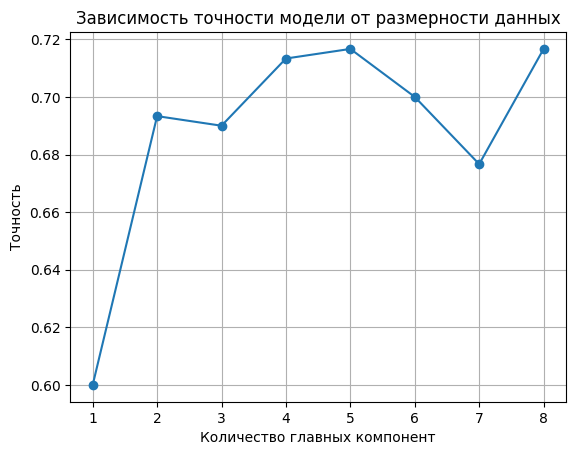

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение диапазона размерностей
dimensions = np.arange(1, data.shape[1] + 1)
accuracies = []

for dim in dimensions:
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.3, random_state=42)
    clf_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = clf_pca.predict(X_test_pca)
    accuracies.append(metrics.accuracy_score(y_test_pca, y_pred_pca))

plt.plot(dimensions, accuracies, marker='o')
plt.title('Зависимость точности модели от размерности данных')
plt.xlabel('Количество главных компонент')
plt.ylabel('Точность')
plt.grid(True)
plt.show()


10. Сделайте вывод о применимости модели.



Модель случайных лесов показала снижение точности после понижения размерности данных. Это указывает на то, что метод PCA может не всегда улучшать результаты классификации и требует тщательной настройки и анализа данных для достижения наилучших результатов.